# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Developer Stress Dataset](https://www.kaggle.com/datasets/mabubakrsiddiq/developer-stress-simulation-dataset)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

/kaggle/input/developer-stress-simulation-dataset/developer_stress.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('developer_stress.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,Hours_Worked,Sleep_Hours,Bugs,Deadline_Days,Coffee_Cups,Meetings,Interruptions,Experience_Years,Code_Complexity,Remote_Work,Stress_Level
0,10,8,25,53,4,9,2,Senior,Medium,Yes,58.521033
1,7,8,33,33,2,6,9,Junior,Medium,Yes,47.461651
2,14,8,44,54,10,12,2,Junior,Low,No,59.211580
3,11,6,5,46,0,13,9,Mid,Low,Yes,100.000000
4,8,7,36,23,9,3,2,Junior,Medium,Yes,28.784957


## last Five row

In [4]:
df.tail()

,Hours_Worked,Sleep_Hours,Bugs,Deadline_Days,Coffee_Cups,Meetings,Interruptions,Experience_Years,Code_Complexity,Remote_Work,Stress_Level
495,9,4,35,58,7,5,1,Mid,Low,Yes,100.000000
496,12,3,48,19,2,16,1,Mid,Low,No,100.000000
497,15,7,38,5,3,12,1,Junior,Medium,Yes,87.110845
498,8,8,39,18,9,18,3,Mid,Low,Yes,51.088981
499,4,6,34,56,5,20,0,Mid,High,Yes,22.977132


## Shape of our dataset

In [5]:
df.shape

(500, 11)

## List out all columns

In [6]:
df.columns

Index(['Hours_Worked', 'Sleep_Hours', 'Bugs', 'Deadline_Days', 'Coffee_Cups',
       'Meetings', 'Interruptions', 'Experience_Years', 'Code_Complexity',
       'Remote_Work', 'Stress_Level'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

Hours_Worked          int64
Sleep_Hours           int64
Bugs                  int64
Deadline_Days         int64
Coffee_Cups           int64
Meetings              int64
Interruptions         int64
Experience_Years     object
Code_Complexity      object
Remote_Work          object
Stress_Level        float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hours_Worked      500 non-null    int64  
 1   Sleep_Hours       500 non-null    int64  
 2   Bugs              500 non-null    int64  
 3   Deadline_Days     500 non-null    int64  
 4   Coffee_Cups       500 non-null    int64  
 5   Meetings          500 non-null    int64  
 6   Interruptions     500 non-null    int64  
 7   Experience_Years  500 non-null    object 
 8   Code_Complexity   500 non-null    object 
 9   Remote_Work       500 non-null    object 
 10  Stress_Level      500 non-null    float64
dtypes: float64(1), int64(7), object(3)
memory usage: 43.1+ KB


## Check Null Value

In [9]:
df.isnull().sum()

Hours_Worked        0
Sleep_Hours         0
Bugs                0
Deadline_Days       0
Coffee_Cups         0
Meetings            0
Interruptions       0
Experience_Years    0
Code_Complexity     0
Remote_Work         0
Stress_Level        0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,Hours_Worked,Sleep_Hours,Bugs,Deadline_Days,Coffee_Cups,Meetings,Interruptions,Stress_Level
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.504000,5.436000,25.150000,30.676000,4.922000,10.164000,4.968000,77.004177
std,3.543317,1.706378,14.909866,17.284691,3.155286,6.227573,3.074717,27.656360
min,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492625
25%,6.000000,4.000000,11.000000,16.000000,2.000000,5.000000,2.000000,56.315125
50%,10.000000,5.000000,26.000000,31.000000,5.000000,10.000000,5.000000,94.139876
75%,13.000000,7.000000,37.000000,45.000000,8.000000,16.000000,8.000000,100.000000
max,15.000000,8.000000,50.000000,60.000000,10.000000,20.000000,10.000000,100.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

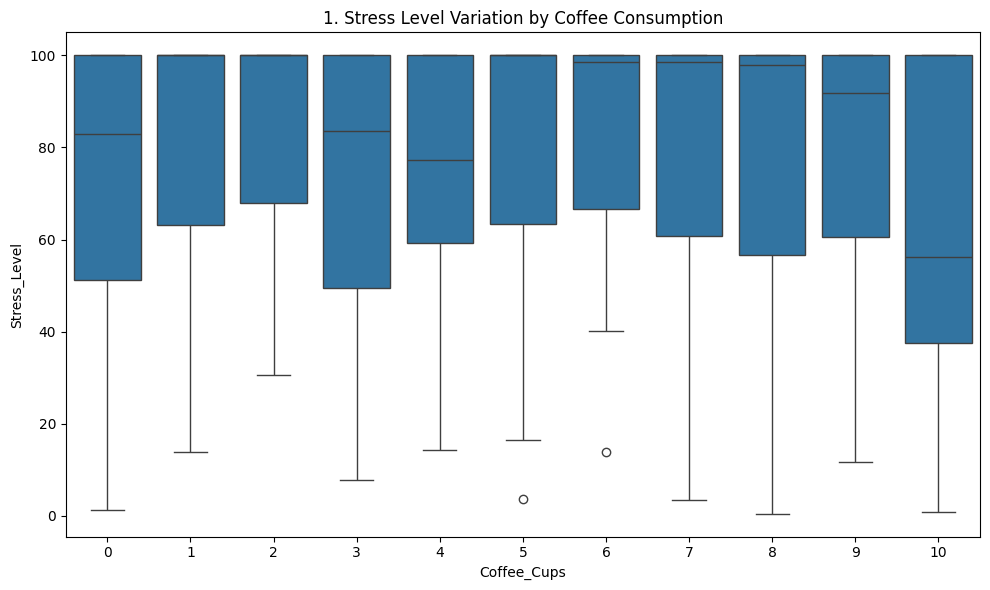

In [13]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Coffee_Cups', y='Stress_Level', data=df)
plt.title(f'{plot_no}. Stress Level Variation by Coffee Consumption')
show_fig()
plot_no += 1


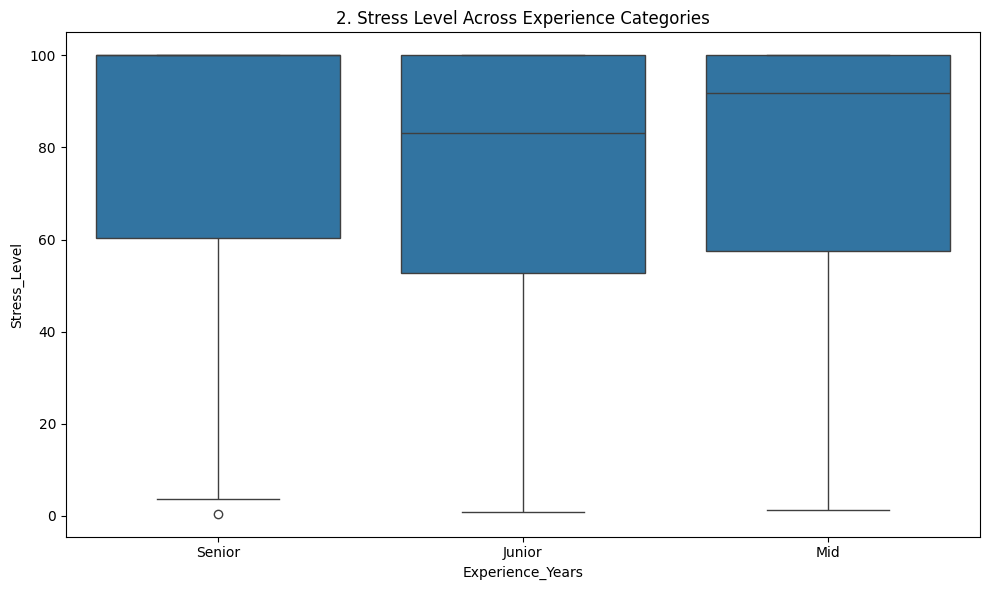

In [14]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Experience_Years', y='Stress_Level', data=df)
plt.title(f'{plot_no}. Stress Level Across Experience Categories')
show_fig()
plot_no += 1


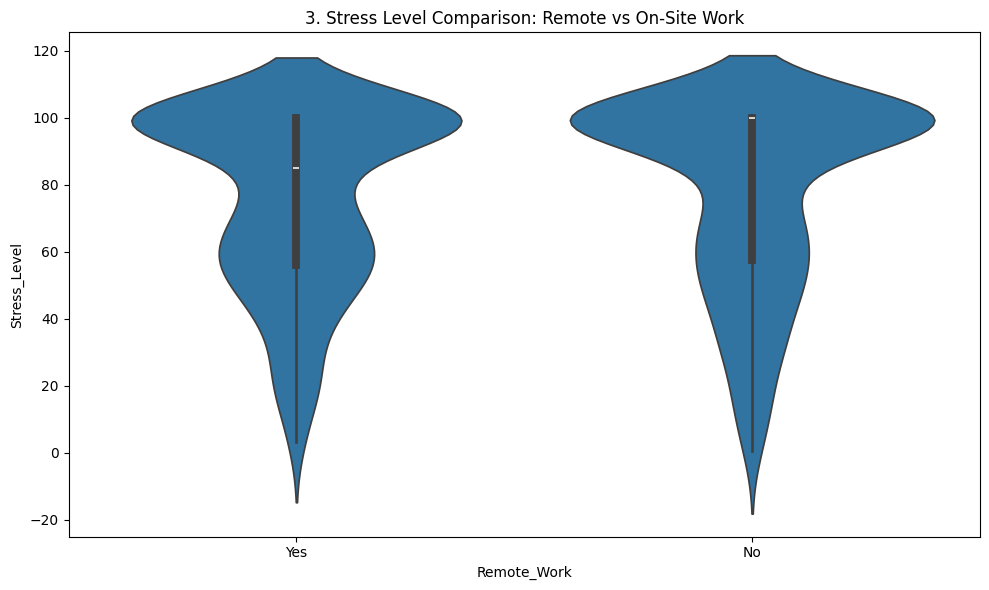

In [15]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(x='Remote_Work', y='Stress_Level', data=df)
plt.title(f'{plot_no}. Stress Level Comparison: Remote vs On-Site Work')
show_fig()
plot_no += 1


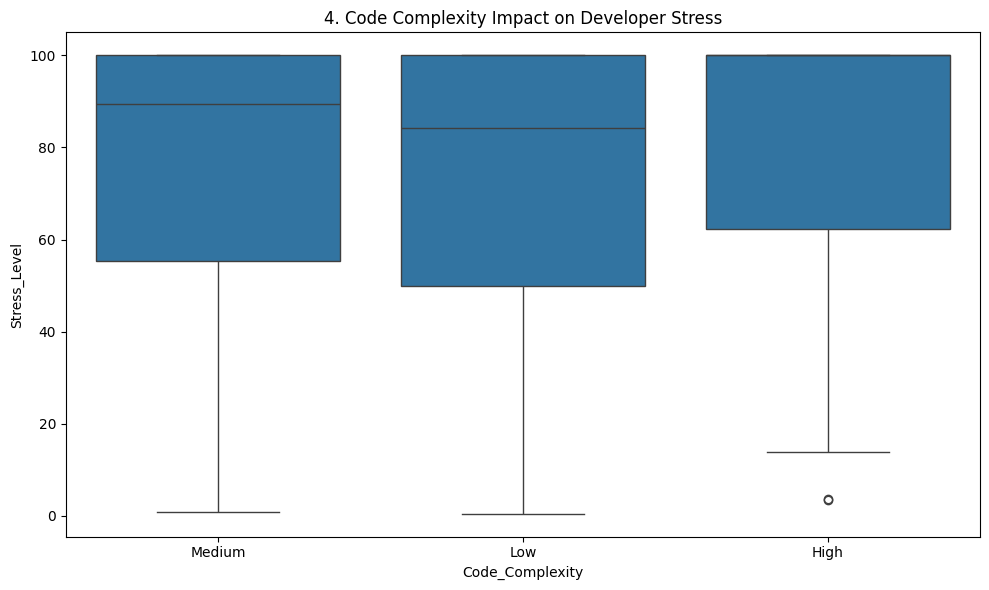

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Code_Complexity', y='Stress_Level', data=df)
plt.title(f'{plot_no}. Code Complexity Impact on Developer Stress')
show_fig()
plot_no += 1


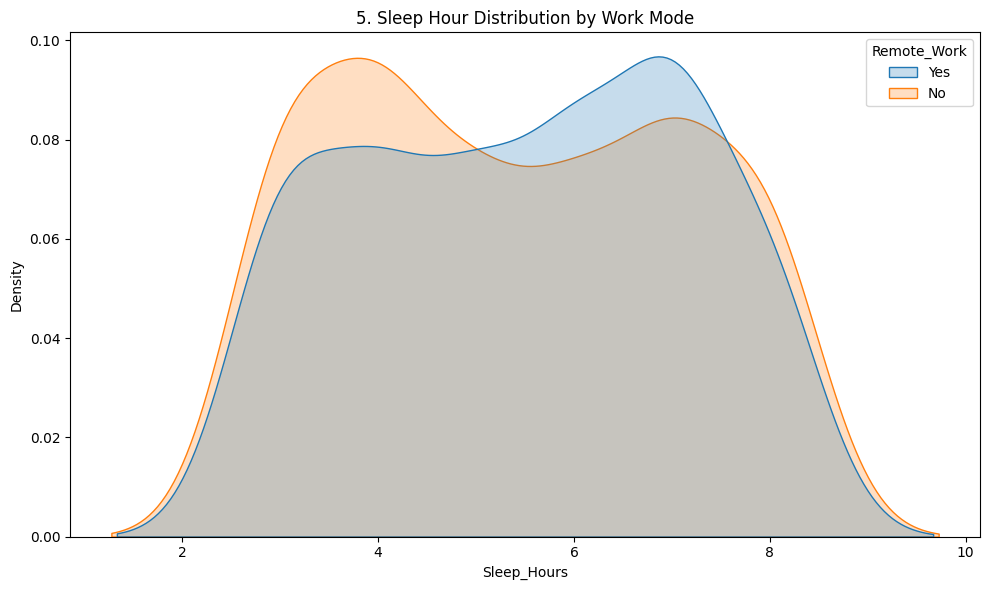

In [17]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Sleep_Hours', hue='Remote_Work', fill=True)
plt.title(f'{plot_no}. Sleep Hour Distribution by Work Mode')
show_fig()
plot_no += 1


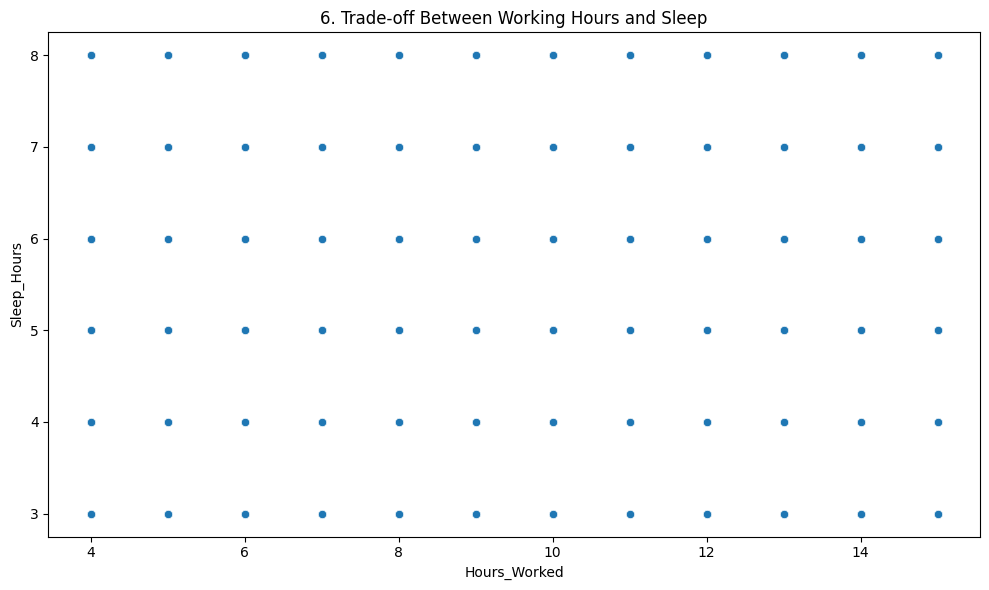

In [18]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Hours_Worked', y='Sleep_Hours', data=df)
plt.title(f'{plot_no}. Trade-off Between Working Hours and Sleep')
show_fig()
plot_no += 1


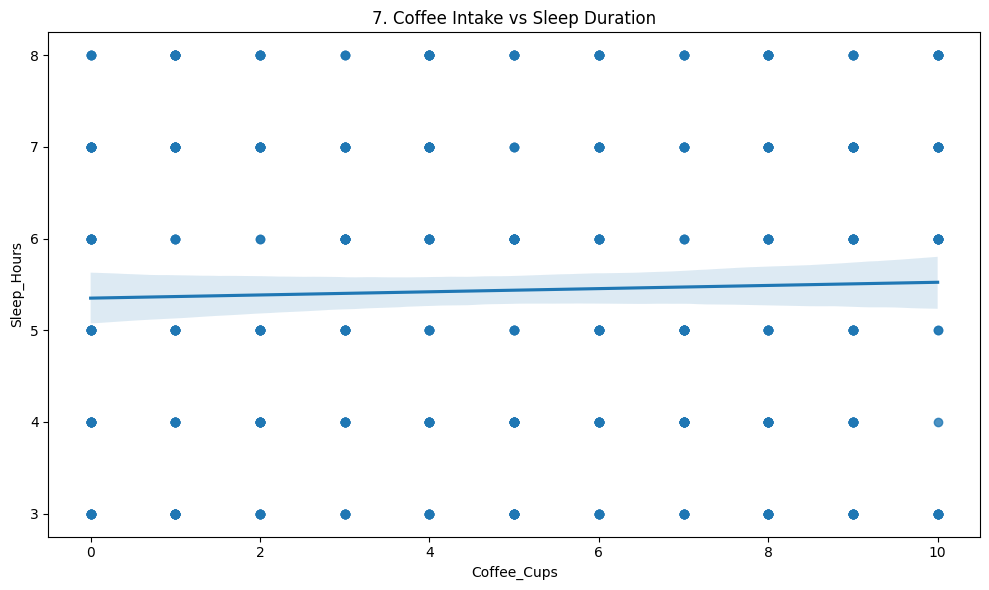

In [19]:
fig = plt.figure(figsize=(10,6))
sns.regplot(x='Coffee_Cups', y='Sleep_Hours', data=df)
plt.title(f'{plot_no}. Coffee Intake vs Sleep Duration')
show_fig()
plot_no += 1


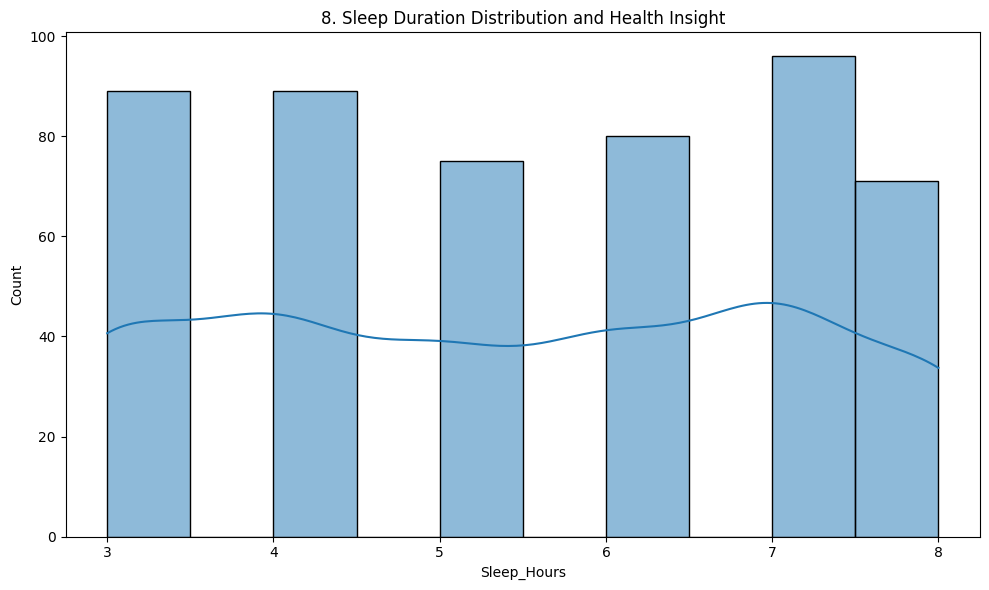

In [20]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Sleep_Hours'], kde=True)
plt.title(f'{plot_no}. Sleep Duration Distribution and Health Insight')
show_fig()
plot_no += 1


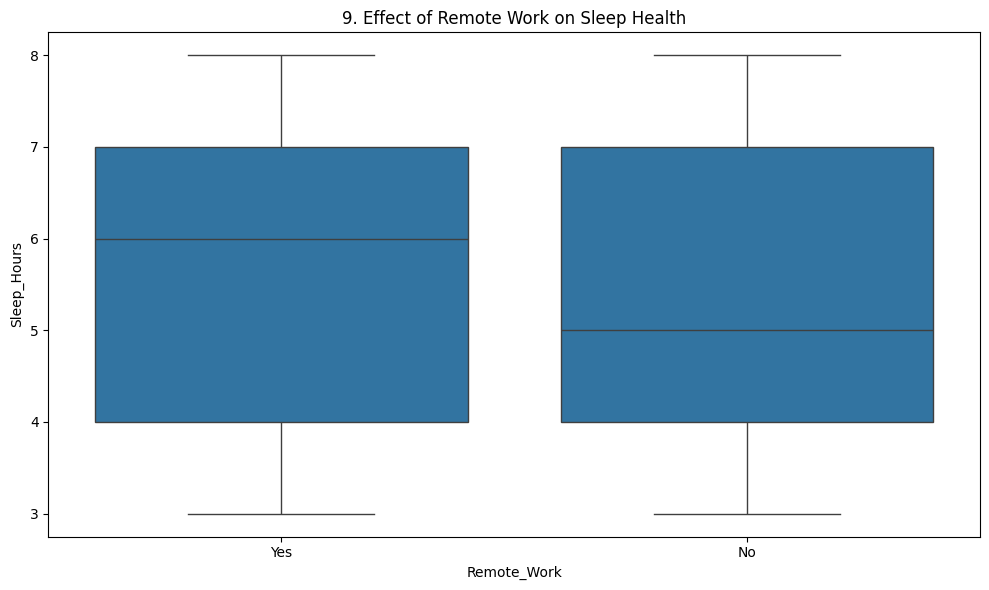

In [21]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Remote_Work', y='Sleep_Hours', data=df)
plt.title(f'{plot_no}. Effect of Remote Work on Sleep Health')
show_fig()
plot_no += 1


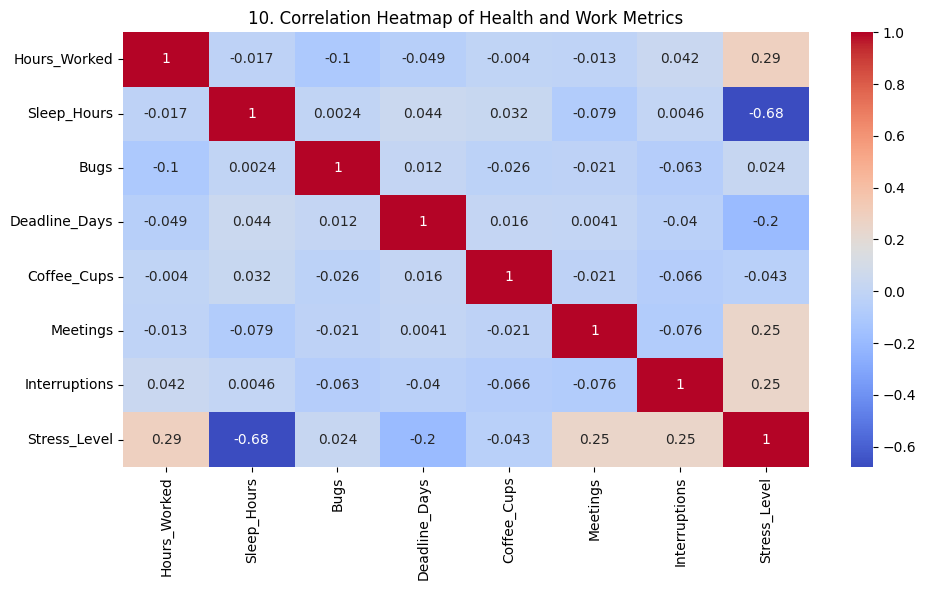

In [22]:
fig = plt.figure(figsize=(10,6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title(f'{plot_no}. Correlation Heatmap of Health and Work Metrics')
show_fig()
plot_no += 1


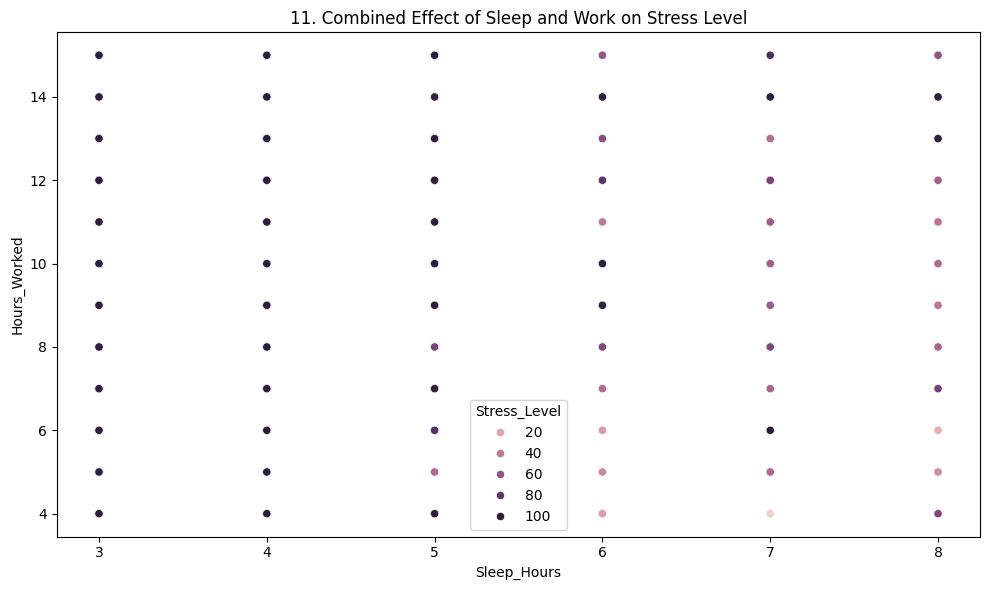

In [23]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Sleep_Hours', y='Hours_Worked', hue='Stress_Level', data=df)
plt.title(f'{plot_no}. Combined Effect of Sleep and Work on Stress Level')
show_fig()
plot_no += 1


# Model Training

## Select features and target

In [24]:
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']

## Convert categorical features to numeric

In [25]:
X = pd.get_dummies(X, drop_first=True)

## Split dataset into train and test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Scale the features

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Linear Regression model

In [28]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Predict on test data

In [29]:
y_pred = model.predict(X_test_scaled)

## Print model accuracy (R² Score)

In [30]:
accuracy = r2_score(y_test, y_pred) * 100
print("Model R² Accuracy Score:", round(accuracy, 3))

Model R² Accuracy Score: 55.787


## Plot Actual vs Predicted Stress Level

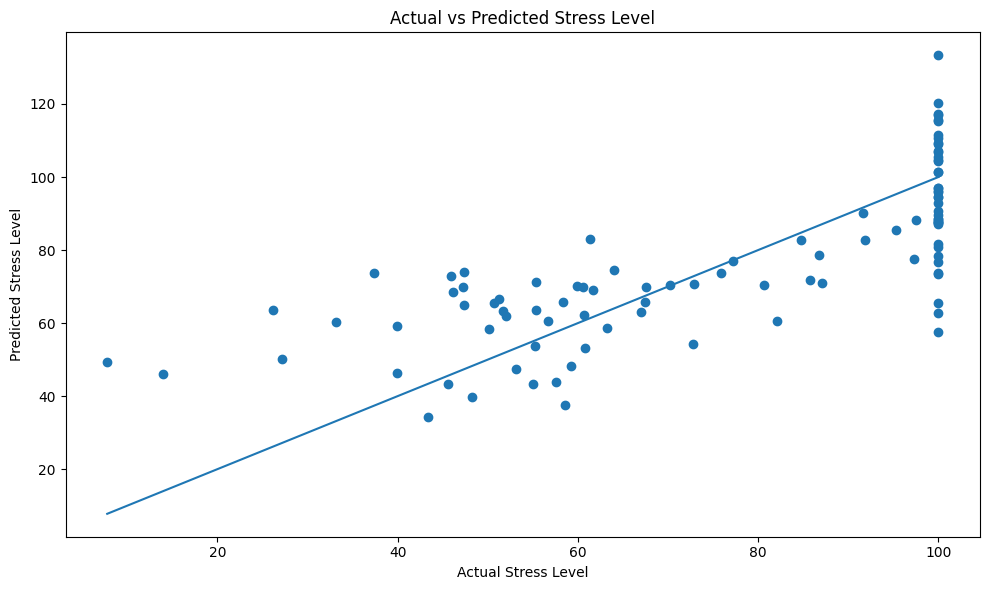

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Actual vs Predicted Stress Level")
plt.tight_layout()
plt.show()
